#### In google colab you may need to install the below library.

In [1]:
%pip install colorama

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sys
import os
%matplotlib inline

In [3]:
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnv(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      # P[s][a] = (prob, next_state, reward, is_done)
      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,45,63,64]
      no_down = lambda s: s in [23,24,25,44]
      no_left = lambda s: s in [44,36,55]
      no_right = lambda s: s in [32,42,52]

      #Barries in the path
      pit = lambda s: s in [13,62,41]
      wall = lambda s: s in [43,33,53,34,35,54]

      #Rewards of each state
      reward = 1.0 if is_done(s) else 0.0
      reward = -10.0 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, -3.0 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, -3.0 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, -3.0 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, -3.0 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnv, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,62,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,62,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,35,54]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

### How to use the above class? ###

In [ ]:
env =  GridworldEnv()
env.reset()
env._render()

for _ in range(4):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) # Take a random action
    print(info)
    print('action:',action)
    env._render()
env.close()


       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    웃   .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
{'prob': 1.0}
action: 1
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    .    웃   .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    . 

##On Policy First Visit MC

Total Execution Time =  2.549733579158783 Min


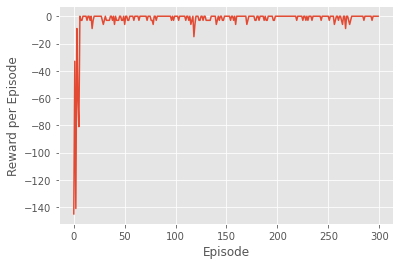

In [ ]:
class OnPolicyMCAgent:
    def __init__(self,environment,discount_factor = 0.9,epsilon = 0.25):
        self.epsilon = epsilon
        self.env = environment
        self.q = np.zeros((self.env.nS, self.env.nA))
        self.Returns = list('')
        for i in range(self.env.nS):
            self.Returns.append(list(''))
            for j in range (self.env.nA):
                self.Returns[i].append(list(''))
        self.gamma = discount_factor
        pass

    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        # This Function will be used for greedy decision making in control
        res = np.ones(self.env.nA, dtype = np.float64) * (self.epsilon / self.env.nA)
        res[np.argmax(values)] += 1.0 - self.epsilon
        return res

    def generate_episode(self): #Using epsilon soft policy
        state = self.env.reset()
        trajectory = []
        while True:
            # Decision Making Based On Policy without exploring start
            probs = self.probabilities(self.q[state])
            action = np.random.choice(np.arange(self.env.nA),p=probs)
            next_state, reward, done, info = self.env.step(action)
            trajectory.append((state,action,reward))
            state = next_state
            if done or len(trajectory) == 700: # episode max length of 700
                return trajectory


    def control(self):
        reward_sum = 0
        G = 0
        episode = self.generate_episode()
        for idx,step in enumerate(episode[::-1]):
            reward_sum += step[2]
            G = self.gamma * G + step[2]
            if step[0] not in np.array(episode[::-1])[:,0][idx+1:]: # first visit check
                self.Returns[step[0]][step[1]].append(G)
                self.q[step[0]][step[1]] = np.mean(self.Returns[step[0]][step[1]])
        return reward_sum
    
    def print_agent(self):
        ax = sns.heatmap(np.argmax(self.q,axis=1).reshape((10,10)))
        print(np.argmax(self.q,axis=1).reshape((10,10)))

    def __exit__(self):
        self.env.close()


env = GridworldEnv()
agent1 = OnPolicyMCAgent(env)

reward_hist = list('')
start = time.time()

for i in range(300): # number of episodes
    reward_hist.append(agent1.control())

print('Total Execution Time = ', (time.time() - start) / 60 , 'Min')
agent1.print_agent()
%matplotlib inline
plt.plot(reward_hist)
plt.ylabel('Reward per Episode')
plt.xlabel('Episode')
plt.show()

##Off Policy MC Control

Total Execution Time =  5.328935043017069 Min


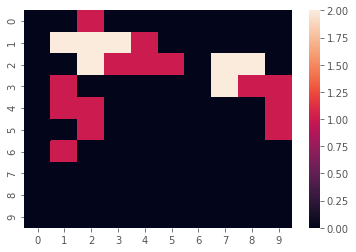

[[0 0 1 0 0 0 0 0 0 0]
 [0 2 2 2 1 0 0 0 0 0]
 [0 0 2 1 1 1 0 2 2 0]
 [0 1 0 0 0 0 0 2 1 1]
 [0 1 1 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


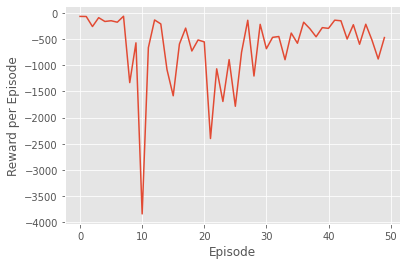

In [ ]:
class OffPolicyMCAgent:
    def __init__(self,environment,discount_factor = 0.9,epsilon = 0.2):
        self.epsilon = epsilon
        self.gamma = discount_factor
        self.env = environment

        self.Q = np.zeros((self.env.nS,self.env.nA))
        self. C = np.zeros((self.env.nS,self.env.nA))

    def behaviour(self,state):
        # an epsilon greed with const epsilon
        prob = np.ones(self.env.nA, dtype = np.float64) * (self.epsilon / self.env.nA)
        prob[np.argmax(self.Q[state])] += 1.0 - self.epsilon
        #prob = np.ones(self.env.nA) / self.env.nA # in case you want to use random polic
        action = np.random.choice(np.arange(self.env.nA),p= prob)
        return action

    def generate_episode(self):
        state = self.env.reset()
        trajectory = list('')
        while True:
            # Decision Making Based On a  Policy
            action =self.behaviour(state)
            next_state, reward, done, info = self.env.step(action)
            trajectory.append((state,action,reward))
            state = next_state
            if done:
                return trajectory

    def control(self):
        G = 0
        W = 1
        episode = self.generate_episode()
        for idx, step in enumerate(episode[::-1]):
            G = self.gamma * G + step[2]
            if step[0] not in np.array(episode[::-1])[:,0][idx+1:]:# first visit check
                self.C[step[0]][step[1]]  += W
                self.Q[step[0]][step[1]] += (W/self.C[step[0]][step[1]]) * (G -self.Q[step[0]][step[1]])
                
                action = np.argmax(self.Q[step[0]]) # target policy -> greedy argmax
                if action != step[1]:
                    break
                
                # behaviour is an epsilon soft policy
                W *= (1.0/(1.0 - self.epsilon + self.epsilon / self.env.nA))
        return (np.sum(episode,axis=0)[2])
    
    def print_agent(self):
        ax = sns.heatmap(np.argmax(self.Q,axis=1).reshape((10,10)))
        plt.show()
        print(np.argmax(self.Q,axis=1).reshape((10,10)))

    def __exit__(self):
        self.env.close()
        
env = GridworldEnv()
agent2 = OffPolicyMCAgent(env)

reward_hist = list('')
start = time.time()
for i in range(50): # number of episodes
    reward_hist.append(agent2.control())
print('Total Execution Time = ', (time.time() - start) / 60 , 'Min')
agent2.print_agent()
%matplotlib inline
plt.plot(reward_hist)
plt.ylabel('Reward per Episode')
plt.xlabel('Episode')
plt.show()

## SARSA

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

Total Execution Time:  3.858107240994771 Min


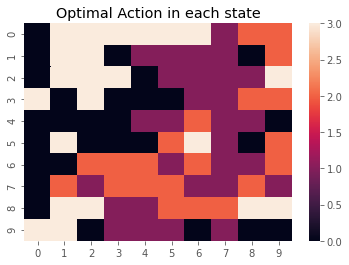

[[0 3 3 3 3 3 3 1 2 2]
 [0 3 3 0 1 1 1 1 0 2]
 [0 3 3 3 0 1 1 1 1 3]
 [3 0 3 0 0 0 1 1 2 2]
 [0 0 0 0 1 1 2 1 1 0]
 [0 3 0 0 0 2 3 1 0 2]
 [0 0 2 2 2 1 2 1 1 2]
 [0 2 1 2 2 2 1 1 2 1]
 [0 3 3 1 1 2 2 2 3 3]
 [3 3 0 1 1 1 0 1 0 0]]
[-72.0, -109.0, -28.0, -45.0, 0.0, 0.0, 0.0, -3.0, 0.0, -6.0, -12.0, 0.0, -3.0, -42.0, -6.0, 0.0, -32.0, -3.0, -23.0, -33.0, -13.0, -13.0, -3.0, -3.0, 0.0, 0.0, -36.0, -16.0, -3.0, 0.0, -23.0, 0.0, -10.0, 0.0, -10.0, -10.0, -6.0, 0.0, -33.0, -3.0, -16.0, 0.0, -16.0, -3.0, -3.0, -9.0, -9.0, 0.0, -12.0, -3.0, -13.0, -13.0, -19.0, -23.0, -13.0, -9.0, 0.0, -23.0, -12.0, -16.0, -50.0, -55.0, -3.0, 0.0, -22.0, -12.0, -10.0, -36.0, -6.0, 0.0, -20.0, -21.0, -19.0, -31.0, -13.0, -6.0, 0.0, -6.0, -6.0, -29.0, -3.0, 0.0, 0.0, -6.0, 0.0, -10.0, 0.0, -10.0, -3.0, -34.0, -13.0, -6.0, -9.0, -15.0, -9.0, -16.0, 0.0, -9.0, -3.0, 0.0]


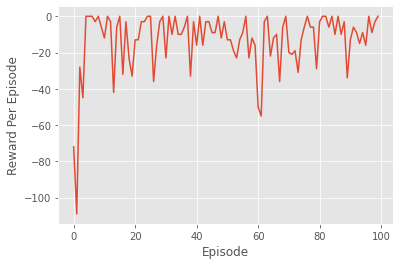

In [ ]:
class SARSA:
    def __init__(self, environment, discount_factor = 1.0, epsilon = 0.3, learning_rate = 0.5):
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.env = environment
        self.epsilon = epsilon
        
        self.Q = np.zeros((self.env.nS,self.env.nA))
        self.state = self.env.reset()

    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        # This Function will be used for epsilon greedy decision making in control
        res = np.ones(self.env.nA, dtype = np.float64) * (self.epsilon / self.env.nA)
        res[np.argmax(values)] += 1.0 - self.epsilon
        return res
    
    def control(self):
        reward_sum = 0
        # Choosing an Action Based On Epsilon Greedy Policy
        action = np.random.choice(np.arange(self.env.nA), p=self.probabilities(self.Q[self.state]))
        # Loop for single episode
        while True:
            
            next_state, reward, done, info = self.env.step(action)
            reward_sum += reward

            next_action = np.random.choice(np.arange(self.env.nA),p=self.probabilities(self.Q[next_state]))
            
            # Temporal Difference Update
            self.Q[self.state][action] += self.alpha * (reward + self.gamma * self.Q[next_state][next_action] -self.Q[self.state][action])
            
            if done:
                self.state = self.env.reset()
                break
            self.state = next_state
            action = next_action

        return reward_sum

    def print_agent(self):
        ax = sns.heatmap(np.argmax(self.Q,axis=1).reshape((10,10)))
        ax.set_title("Optimal Action in each state")
        plt.show()
        print(np.argmax(self.Q,axis=1).reshape((10,10)))

    def __exit__(self):
        self.env.close()

env = GridworldEnv()
agent3 = SARSA(env)
reward_hist = list('')
start_time = time.time()
for _ in range(100):
    print(_)
    try:
        reward_hist.append(agent3.control())
    except KeyboardInterrupt:
        break
    print('\b'*4)
print('Total Execution Time: ', (time.time() - start_time)/60 , 'Min')
agent3.print_agent()
%matplotlib inline
print(reward_hist)
plt.plot(reward_hist)
plt.ylabel('Reward Per Episode')
plt.xlabel('Episode')
plt.show()

##Double Q-Learning

Total Execution Time:  0.10326035817464192 Min


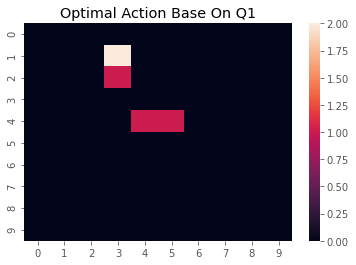

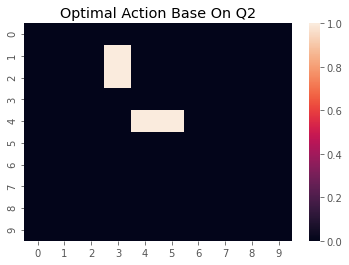

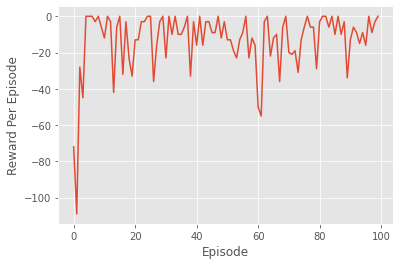

In [ ]:
class DQAgent:
    def __init__(self, environment, discount_factor = 0.9, epsilon = 0.2 , learning_rate = 0.1):
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.env = environment
        self.state = self.env.reset()

        self.Q1 = np.zeros((self.env.nS,self.env.nA))
        self.Q2 = np.zeros((self.env.nS,self.env.nA))
        
    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        # This Function will be used for greedy decision making in control
        res = np.ones(self.env.nA, dtype = np.float64) * (self.epsilon / self.env.nA)
        res[np.argmax(values)] += 1.0 - self.epsilon
        return res
    
    def control(self):
        # Loop for each step of episode
        while True:
            action = np.random.choice(np.arange(self.env.nA),p=self.probabilities(self.Q1[self.state] + self.Q2[self.state]))
            next_state, reward, done, info = self.env.step(action)
            # Update one of the Q-Values Only
            if np.random.uniform(0,1) > 0.5:
                self.Q1[self.state][action] += self.alpha * (reward + self.gamma * self.Q2[next_state][np.argmax(self.Q1[next_state])] - self.Q1[self.state][action])
            else:
                self.Q2[self.state][action] += self.alpha * (reward + self.gamma * self.Q1[next_state][np.argmax(self.Q2[next_state])] - self.Q2[self.state][action])
            self.state = next_state
            if done :
                self.state = self.env.reset()
                break
    
    def print_agent(self):
        ax1 = sns.heatmap(np.argmax(self.Q1,axis=1).reshape((10,10)))
        ax1.set_title("Optimal Action Base On Q1")
        plt.show()

        ax2 = sns.heatmap(np.argmax(self.Q2,axis=1).reshape((10,10)))
        ax2.set_title("Optimal Action Base On Q2")
        plt.show() 

    def __exit__(self):
        self.env.close()


env =  GridworldEnv()
agent4 = DQAgent(env)

start_time = time.time()
for _ in range(100):
    agent4.control()
print('Total Execution Time: ', (time.time() - start_time)/60 , 'Min')
agent4.print_agent()
%matplotlib inline
plt.plot(reward_hist)
plt.ylabel('Reward Per Episode')
plt.xlabel('Episode')
plt.show()

## Two step Expected SARSA
*n-step off-policy SARSA for estimating Q*

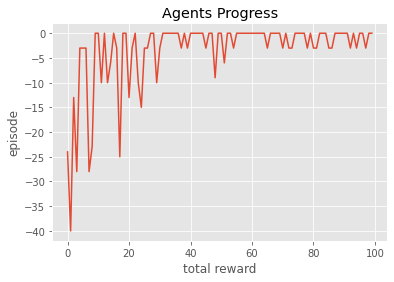

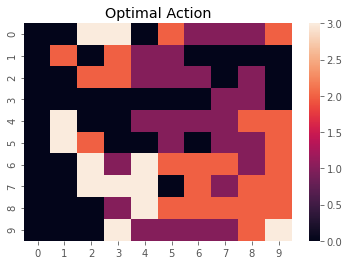

[[0 0 3 3 0 2 1 1 1 2]
 [0 2 0 2 1 1 0 0 0 0]
 [0 0 2 2 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 3 0 0 1 1 1 1 2 2]
 [0 3 2 0 0 1 0 1 1 2]
 [0 0 3 1 3 2 2 2 1 2]
 [0 0 3 3 3 0 2 1 2 2]
 [0 0 0 1 3 2 2 2 2 2]
 [0 0 0 3 1 1 1 1 2 3]]
Total execution Time:  0.08715939521789551 Min


In [ ]:
class NStepSARSA:
    def __init__(self,environment,n = 2,discount_factor = 0.9, learning_rate = 0.1):
        self.gamma = discount_factor
        self.alpha = learning_rate
        self.env = environment
        self.n = n # n-step SARSA

        self.Q = np.zeros((self.env.nS,self.env.nA))

    def behaviour(self,state, epsilon = 0.3):
        # Behaviour policy is an epsilon greedy policy with constant epsilon
        res = np.ones(self.env.nA, dtype = np.float64) * (epsilon / self.env.nA)
        res[np.argmax(self.Q[state])] += 1.0 - epsilon
        return res
    
    def target(self, state, epsilon = 0.1):
        # Behaviour policy is an epsilon greedy policy too but woth smaller epsilon
        res = np.ones(self.env.nA, dtype = np.float64) * (epsilon / self.env.nA)
        res[np.argmax(self.Q[state])] += 1.0 - epsilon
        return res
    
    def run(self, episode_number):

        reward_per_episode = [0] * episode_number

        for num_episode in range(episode_number):
            state = self.env.reset()
            T = sys.maxsize
            t = -1
            tau = 0

            actions = {}
            states = {}
            rewards = {}

            A0 = np.random.choice(np.arange(self.env.nA), p=self.behaviour(state)) 
            actions[0] = A0
            states[0] = state

            while  tau < (T-1):
                t += 1
                if t < T:
                    #print('checking next step')
                    state, reward, done, info = self.env.step(A0)

                    reward_per_episode[num_episode] += reward
                    rewards[(t+1) % (self.n+1)] = reward
                    states[(t+1) % (self.n+1)] = state

                    if done or t == 500: 
                        T = t + 1
                        #print('episode done')
                    else:
                        #print('episode not done')
                        A0 = np.random.choice(np.arange(self.env.nA),p=self.behaviour(state))
                        actions[(t+1) % (self.n+1)] = A0

                tau = t - self.n + 1
                if tau >= 0:
                    #print('updating....')
                    rho = np.prod([self.target(states[i%(self.n+1)])[actions[i%(self.n+1)]]/(self.behaviour(states[i%(self.n+1)])[actions[i%(self.n+1)]]) for i in range(tau+1, min(tau+self.n-1, T-1)+1)])
                    
                    G = np.sum([(self.gamma**(i-tau-1))*rewards[i%(self.n+1)] for i in range(tau+1, min(tau+self.n, T)+1)])

                    if (tau + self.n) < T:
                        G += (self.gamma**self.n) * self.Q[states[(tau+self.n) % (self.n+1)]][actions[(tau+self.n) % (self.n+1)]]

                    self.Q[states[tau % (self.n+1)]][actions[tau % (self.n+1)]] += self.alpha * rho * (G - self.Q[states[tau % (self.n+1)]][actions[tau % (self.n+1)]])
            

        self.plot_agent(reward_per_episode)
    
    def plot_agent(self, episode_reward):
        %matplotlib inline
        plt.plot(episode_reward)
        plt.title('Agents Progress')
        plt.ylabel("episode")
        plt.xlabel('total reward')
        plt.show()

        ax2 = sns.heatmap(np.argmax(self.Q,axis=1).reshape((10,10)))
        ax2.set_title("Optimal Action")
        plt.show()
        print(np.argmax(self.Q,axis=1).reshape((10,10))) 

    def __exit__(self):
        self.env.close()


env =  GridworldEnv()
agent5 = NStepSARSA(env)
start_time = time.time()
agent5.run(100)                 
print('Total execution Time: ', (time.time() - start_time)/60, 'Min')


## Tree Back-up
*n-step tree backup off Policy TD without importance sampling*

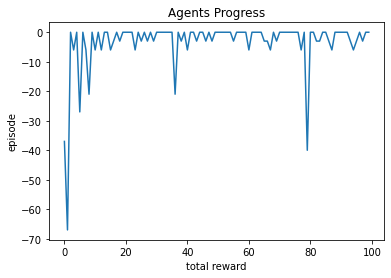

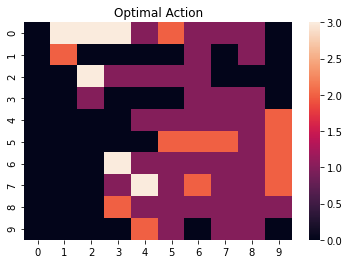

[[0 3 3 3 1 2 1 1 1 0]
 [0 2 0 0 0 0 1 0 1 0]
 [0 0 3 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 2]
 [0 0 0 0 0 2 2 2 1 2]
 [0 0 0 3 1 1 1 1 1 2]
 [0 0 0 1 3 1 2 1 1 2]
 [0 0 0 2 1 1 1 1 1 1]
 [0 0 0 0 2 1 0 1 1 0]]
Total execution Time:  0.26120213270187376 Min


In [26]:
class TBAgent:
    def __init__(self,environment, n, discount_factor = 0.9, learning_rate = 0.1):
        self.n = n
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.env = environment

        self.Q = np.zeros((self.env.nS,self.env.nA))

    def behavior(self,state, epsilon = 0.3):
        # Behaviour policy is an epsilon greedy policy with constant epsilon
        res = np.ones(self.env.nA, dtype = np.float64) * (epsilon / self.env.nA)
        res[np.argmax(self.Q[state])] += 1.0 - epsilon
        return res
    
    def target(self, state, epsilon = 0.1):
        # Behaviour policy is an epsilon greedy policy too but woth smaller epsilon
        res = np.ones(self.env.nA, dtype = np.float64) * (epsilon / self.env.nA)
        res[np.argmax(self.Q[state])] += 1.0 - epsilon
        return res
    
    def run(self,episode_number):
        
        reward_per_episode = [0] * episode_number

        for num_episode in range(episode_number):
            T = sys.maxsize
            t = -1
            tau = 0

            actions = {}
            rewards = {}
            states = {}

            state = self.env.reset()
            A0 = np.random.choice(np.arange(self.env.nA), p= self.behavior(state))
            actions[0] = A0
            states[0] = state

            #print('.......')
            while tau < (T-1):
                t +=1
                if t < T:
                    state, reward, done, info = self.env.step(A0)

                    reward_per_episode[num_episode] += reward 

                    rewards[(t+1) % (self.n+1)] = reward
                    states[(t+1) % (self.n+1)] = state

                    if done or t == 500: 
                        T = t + 1
                    else:
                        A0 = np.random.choice(np.arange(self.env.nA),p=self.behavior(state))
                        actions[(t+1) % (self.n+1)] = A0

                #print('.......')
                tau = t - self.n + 1
                if tau >= 0:
                    if (t+1) >= T:
                        G = rewards[T % (self.n+1)]
                    else:                        
                        sigma = np.sum([(self.target(states[(t+1) % (self.n+1)])[i]) * self.Q[states[(t+1) % (self.n+1)]][i] for i in range(self.env.nA)])
                        G = rewards[(t+1) % (self.n+1)] + self.gamma * sigma
                    
                    for i in range(min(t, T-1), tau , -1):
                        prob = np.sum([ self.target(states[i%(self.n+1)])[j] * self.Q[states[i%(self.n+1)]][j] for j in range(self.env.nA) if j != actions[i%(self.n+1)] ])
                        G = rewards[i%(self.n+1)] + self.gamma * (prob + self.target(states[i%(self.n+1)])[actions[i%(self.n+1)]]* G)   

                    self.Q[states[tau % (self.n+1)]][actions[tau % (self.n+1)]] += self.alpha * (G - self.Q[states[tau % (self.n+1)]][actions[tau % (self.n+1)]])
        
        self.plot_agent(reward_per_episode)

    def plot_agent(self,episode_reward):
        %matplotlib inline
        plt.plot(episode_reward)
        plt.title('Agents Progress')
        plt.ylabel("episode")
        plt.xlabel('total reward')
        plt.show()

        ax2 = sns.heatmap(np.argmax(self.Q,axis=1).reshape((10,10)))
        ax2.set_title("Optimal Action")
        plt.show()
        print(np.argmax(self.Q,axis=1).reshape((10,10))) 
        pass

    def __exit__(self):
        self.env.close()


env = GridworldEnv()
agent6 = TBAgent(env, n= 5)
start_time = time.time()
agent6.run(100)
print('Total execution Time: ', (time.time() - start_time)/60, 'Min')